# Fabio Tatti s282383

Collaborated with: ("Andrea Silvi", "s290312"), ("Andrea Rizzardi", "s287396"), ("Maria Francesca Turco", "s278427")

# Exercise 1

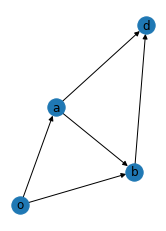

In [46]:
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib inline

#we build the graph
G = nx.DiGraph()
nodes = ["o", "a","b","d"]
edges = [("o","a"),("o","b"),("a","b"),("a","d"),("b","d")]
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G.edges
dict(G.edges)
plt.subplot(121)
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels = True)


b) Assume that the link capacities are:
    C1 = C4 = 3, C2 = C3 = C5 = 2.
Where should 1 unit of additional capacity be allocated in order to maximize the feasible
throughput from o to d? What is the maximal throughput?    

The maximum flow in this setup is 5


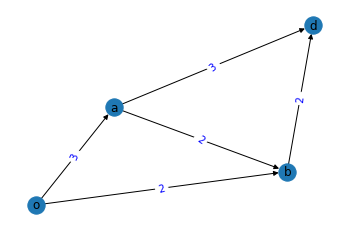

In [48]:
#we add the capacities to the edges 
cap_labels = {("o","a"):3, ("o","b"):2,("a","b"):2,("a","d"):3,("b","d"):2}
G["o"]["a"]["capacity"] = 3
G["o"]["b"]["capacity"] = 2
G["a"]["b"]["capacity"] = 2
G["a"]["d"]["capacity"] = 3
G["b"]["d"]["capacity"] = 2
#we print the graph
nx.draw_networkx_edge_labels(G,pos, edge_labels = cap_labels, font_color="blue"  )
nx.draw(G, pos, with_labels=True)
#we compute the maximum flow between o and d
max_flow=nx.algorithms.flow.maximum_flow(G, "o","d")[0]
print(f"The maximum flow in this setup is {max_flow}")

In [3]:
def check_increase(G,inc, o= "o", d = "d"):
    #function that computes the max flow of all the different configurations
    #of the network given by increasing one edge of a given integer value
    attri = nx.get_edge_attributes(G,"capacity")
    flag = False
    final_ori =0
    final_dest = 0
    for key in attri:
        value = attri[key]
        ori = key[0]
        dest = key[1]
        G[ori][dest]["capacity"] = value + inc
        max_flow_new=nx.algorithms.flow.maximum_flow(G, "o","d")[0]
        G[ori][dest]["capacity"] = value
        if max_flow_new > max_flow:
            flag = True
            print(f"You have to upgrade the edge from {ori} to {dest}")
    if flag == False:
        print(f"There is no way to improve the network flow with {inc} increase of capacity")
    else: 
        return final_ori, final_dest

check_increase(G, 1)    

There is no way to improve the network flow with 1 increase of capacity


# Exercise 2
Consider the following problem. There are a set of people (p1, p2, p3, p4) and a set of
books (b1, b2, b3, b4). Each person is interested in a subset of books, specifically
p1 → (b1,b2), p2 → (b2,b3), p3 → (b1,b4), p4 → (b1,b2,b4).


a) Represent the interest pattern by using a simple bipartite graph.


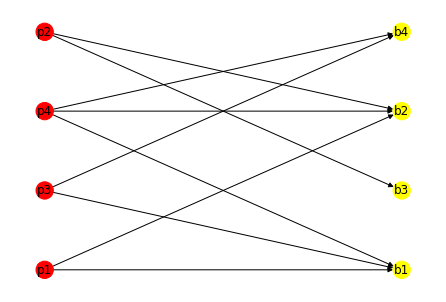

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

#we build the bipartite graph 
nodes_2 = ["p1","p2","p3","p4","b1","b2","b3","b4"]
edges_2 = {("p1", "b1"):1,("p1","b2"):1,("p2","b2"):1,("p2","b3"):1,\
           ("p3","b1"):1,("p3","b4"):1,("p4","b1"):1,("p4","b2"):1,("p4","b4"):1}
color_map =["red","red","red","red","yellow","yellow","yellow","yellow"]
G_2 = nx.DiGraph()
G_2.add_nodes_from(nodes_2)
G_2.add_edges_from(edges_2)

#we print the bipartite graph
pos = nx.bipartite_layout(G_2, ["p1","p2","p3","p4"])

nx.draw(G_2,pos,node_color=color_map, with_labels = True)
plt.show()

b) Exploit max-flow problems to establish whether there exists a perfect matching that assigns to every person a book of interest. If a perfect matching exists, find at least a perfect matching.

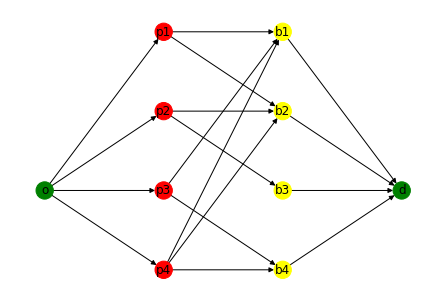

In [52]:
#we add to the graph the o and d nodes and relative edges to exploit the max-flow method
new_nodes_2 = ["o","d"]
new_edges_2 = {("o","p1"):100,("o","p2"):100,("o","p3"):100,("o","p4"):100,\
              ("b4","d"):1,("b2","d"):1,("b1","d"):1,("b3","d"):1}
G_2.add_nodes_from(new_nodes_2)
G_2.add_edges_from(new_edges_2)
#we print the graph
color_map =["red","red","red","red","yellow","yellow","yellow","yellow","green","green"]
pos = {"p1":[0,2], "p2":[0,1], "p3":[0,0], "p4":[0,-1], "b1":[1,2], "b2":[1,1], "b3":[1,0], "b4":[1,-1], "o":[-1,0], "d":[2,0]}

nx.draw(G_2,pos,node_color=color_map, with_labels = True)
plt.show()

In [53]:
#we set the various edges capacities to 1 
G_2["o"]["p1"]["capacity"]=1
G_2["o"]["p2"]["capacity"]=1
G_2["o"]["p3"]["capacity"]=1
G_2["o"]["p4"]["capacity"]=1
G_2["p1"]["b1"]["capacity"]=1
G_2["p1"]["b2"]["capacity"]=1
G_2["p2"]["b2"]["capacity"]=1
G_2["p2"]["b3"]["capacity"]=1
G_2["p3"]["b1"]["capacity"]=1
G_2["p3"]["b4"]["capacity"]=1
G_2["p4"]["b1"]["capacity"]=1
G_2["p4"]["b2"]["capacity"]=1
G_2["p4"]["b4"]["capacity"]=1
G_2["b1"]["d"]["capacity"]=1
G_2["b2"]["d"]["capacity"]=1
G_2["b3"]["d"]["capacity"]=1
G_2["b4"]["d"]["capacity"]=1

There is an analogy between perfect matchings and maximal flow on this auxiliary network  𝐺1 . In particular, a  𝑉0 -perfect matching on  𝐺  exists if and only if it there exists a flow with throughput  |𝑉0|  on the network  𝐺1 . We can now exploit Ford-Fulkerson algorithm to find the maximum flow that can be sent in  𝐺1 .

In [54]:
#we use nx function to compute the maximum flow 
print(f"Since the maximum flow is equal to {nx.algorithms.flow.minimum_cut(G_2,'o','d')[0]} a perfect matching does exist")

Since the maximum flow is equal to 4 a perfect matching does exist


Now we search for a perfect matching configuration. 

In [8]:
max_flow, best_path = nx.algorithms.flow.maximum_flow(G_2,"o","d")
#best_path is a dictionary with the flow that goes through each edge
#we print the couples of nodes in the perfect match
for k,d in best_path.items():
    if k[0] == "p":
        book = None
        for b,f in d.items():
            if int(f) != 0:
                book = b
        print(f'{k} --> {book}')

p1 --> b2
p2 --> b3
p3 --> b1
p4 --> b4


c) Assume now that there are multiple copies of book, specifically the distribution of the number of copies is (2,3,2,2), and there is no constraint on the number of books that each person can take. Use the analogy with max-flow problems to establish how many books of interest can be assigned in total.

8 books can be assigned
{'p1': {'b1': 0, 'b2': 1}, 'p2': {'b2': 1, 'b3': 1}, 'p3': {'b1': 1, 'b4': 1}, 'p4': {'b1': 1, 'b2': 1, 'b4': 1}, 'b1': {'d': 2}, 'b2': {'d': 3}, 'b3': {'d': 1}, 'b4': {'d': 2}, 'o': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3}, 'd': {}} 


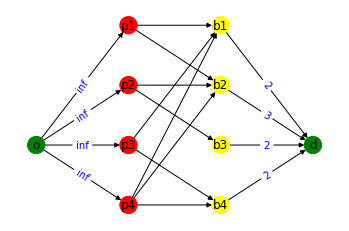

In [59]:
cap_labels = {("o","p1"):"inf", ("o","p2"):"inf",("o","p3"):"inf",("o","p4"):"inf",("b1","d"):"2",("b2","d"):"3",("b3","d"):"2",("b4","d"):"2"}
#we set the new values of the capacity over edges from o to P and from B to d
G_2["b1"]["d"]["capacity"]=2
G_2["b2"]["d"]["capacity"]=3
G_2["b3"]["d"]["capacity"]=2
G_2["b4"]["d"]["capacity"]=2
G_2["o"]["p1"]["capacity"]=float("inf")
G_2["o"]["p2"]["capacity"]=float("inf")
G_2["o"]["p3"]["capacity"]=float("inf")
G_2["o"]["p4"]["capacity"]=float("inf")
#print the new graph and the max flow
nx.draw_networkx_edge_labels(G,pos, edge_labels = cap_labels, font_color="blue"  )
print(f"{nx.algorithms.flow.maximum_flow(G_2,'o','d')[0]} books can be assigned")
print(f"{nx.algorithms.flow.maximum_flow(G_2,'o','d')[1]} ")

nx.draw(G_2,pos,node_color=color_map, with_labels = True)


In [11]:
max_flow, best_path = nx.algorithms.flow.maximum_flow(G_2,"o","d")
#best_path is a dictionary with the flow that goes through each edge
#we print for each person the relative book link, if value is 0 the person
#cannot take the book, if 1 instead yes
for k,d in best_path.items():
    if k[0] == "p":
        print(f'{k} --> {d}')

p1 --> {'b1': 0, 'b2': 1}
p2 --> {'b2': 1, 'b3': 1}
p3 --> {'b1': 1, 'b4': 1}
p4 --> {'b1': 1, 'b2': 1, 'b4': 1}


d) Suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?

In [13]:
#we check the minimum cut to understand which book has more copies than requested
nx.algorithms.flow.minimum_cut(G_2,"o","d")

(8, ({'b1', 'b2', 'b4', 'o', 'p1', 'p2', 'p3', 'p4'}, {'b3', 'd'}))

The new maximum flow is 9
The new cut is ({'p1', 'b1', 'b3', 'b4', 'p3', 'o', 'p2', 'p4', 'b2'}, {'d'})


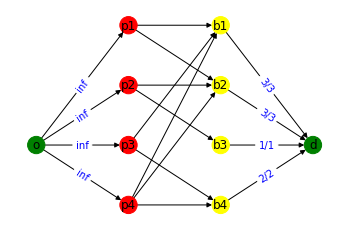

In [63]:
cap_labels = {("o","p1"):"inf", ("o","p2"):"inf",("o","p3"):"inf",("o","p4"):"inf",("b1","d"):"3/3",("b2","d"):"3/3",("b3","d"):"1/1",("b4","d"):"2/2"}
#we change the capacities to check if with 3 copies of b1 and 1 of b3 the maximum throughput
#increases, meaning that we are able to satisfy all people's requests
G_2["b1"]["d"]["capacity"]=3
G_2["b2"]["d"]["capacity"]=3
G_2["b3"]["d"]["capacity"]=1
G_2["b4"]["d"]["capacity"]=2
G_2["o"]["p1"]["capacity"]=float("inf")
G_2["o"]["p2"]["capacity"]=float("inf")
G_2["o"]["p3"]["capacity"]=float("inf")
G_2["o"]["p4"]["capacity"]=float("inf")
#print the new maximum flow and graph
nx.draw_networkx_edge_labels(G,pos, edge_labels = cap_labels, font_color="blue"  )
print(f"The new maximum flow is {nx.algorithms.flow.maximum_flow(G_2,'o','d')[0]}")
nx.draw(G_2,pos,node_color=color_map, with_labels = True)
print(f'The new cut is {nx.algorithms.flow.minimum_cut(G_2,"o","d")[1]}')

# Exercise 3
We are given the highway network in Los Angeles, see Figure 2. To simplify the problem, an approximate highway map is given in Figure 3, covering part of the real highway network. The node-link incidence matrix B, for this traffic network is given in the file traffic.mat. The rows of B are associated with the nodes of the network and the columns of B with the links. The i-th column of B has 1 in the row corresponding to the tail node of link ei and (−1) in the row corresponding to the head node of link ei. Each node represents an intersection between highways (and some of the area around).

Each link ei ∈ {e1, . . . , e28}, has a maximum flow capacity Cei . The capacities are given as a vector Ce in the file capacities.mat. Furthermore, each link has a minimum travelling time lei , which the drivers experience when the road is empty. In the same manner as for the capacities, the minimum travelling times are given as a vector le in the file traveltime.mat. Theses values are simply retrieved by dividing the length of the highway segment with the assumed speed limit 60 miles/hour.

In [15]:
import scipy
from scipy import io
#loading .mat files
file = io.loadmat("capacities.mat")
capacities = file.get("capacities")
capacities = capacities.reshape(28,)

file = io.loadmat("traveltime.mat")
traveltime = file.get("traveltime")
traveltime = traveltime.reshape(28,)


file = io.loadmat("flow.mat")
flow = file.get("flow")
flow = flow.reshape(28,)


file = io.loadmat("traffic.mat")
traffic = file.get("traffic")

distances = traveltime*60


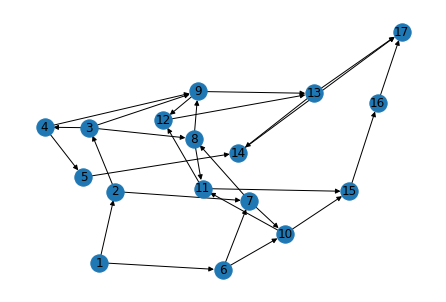

In [16]:
import networkx as nx

#we build the graph G_3 
nodes = list(range(1,18))
G_3 = nx.DiGraph()
G_3.add_nodes_from(nodes)
#now we add the edges
for i in range(1,29):
    #ori and dest are the origin and destination of each column edge
    ori = None
    dest = None
    for j in range(1,18):
        if traffic[j-1][i-1] == 1:
            ori = j
        else:
            if traffic[j-1][i-1] == -1:
                dest = j
    G_3.add_edge(ori, dest)
    G_3[ori][dest]["flow"] = flow[i-1]
    G_3[ori][dest]["traveltime"] = traveltime[i-1]
    G_3[ori][dest]["capacity"] = capacities[i-1]
            
nx.draw(G_3, with_labels=True)


a) Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path with shortest traveling time) in an empty network. First we solve it with the convex optimization, then we exploit the built in function from networkx.

In [17]:
import cvxpy as cp
import numpy as np
#build the incidence matrix B
B = traffic
n_edges = B.shape[1]
n_nodes = B.shape[0]
tau = 1
nu = np.zeros(n_nodes)
nu[0] = 1
nu[-1] = -1
nu = nu*tau
#we define and solve the minimization problem 
f = cp.Variable(n_edges)
objective = cp.Minimize(distances.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print(f.value)
counter = 0
print("Edges included in the fastest path are:")
for i in f.value:
    
    if i >0.2:
        print(f"Edge : {counter+1}")
    counter+= 1

[ 9.99999999e-01  9.99999999e-01 -1.48471654e-10 -5.97503627e-11
  7.69160812e-10  6.15542501e-10  2.90212820e-10  1.97259642e-11
  9.99999992e-01 -2.04276543e-10 -1.13009312e-10  1.00000000e+00
 -8.86858698e-11 -5.96964833e-11  1.53490625e-10  8.32548637e-11
  1.90732064e-10  1.20673873e-10  1.57400914e-10  7.93718800e-09
  3.89362825e-10  8.32659020e-09  1.05400259e-10 -1.48646004e-10
  1.00000000e+00  4.57820688e-11  4.16631485e-11  4.16265303e-11]
Edges included in the fastest path are:
Edge : 1
Edge : 2
Edge : 9
Edge : 12
Edge : 25


In [18]:
#doublecheck with the nx library
print(f"The sequence of nodes in the shortest path are: {nx.algorithms.shortest_paths.generic.shortest_path(G_3, source =1 ,target =17)}")

The sequence of nodes in the shortest path are: [1, 2, 3, 9, 13, 17]


b)Find the maximum flow between node 1 and 17.

In [43]:
#we define and solve the maximization problem 
tau = cp.Variable(1)
f = cp.Variable(n_edges)
nu = np.zeros(n_nodes)
nu[0] = 1
nu[-1] = -1

objective = cp.Maximize(tau)
constraints = [tau>=0, f>=0, f<=capacities, B @ f == tau*nu]
prob = cp.Problem(objective, constraints)
result = prob.solve()

print(f"Optimal tau is {tau.value[0]}")

Optimal tau is 22447.999993077807


The maximum flow from 1 to 17 is 22448


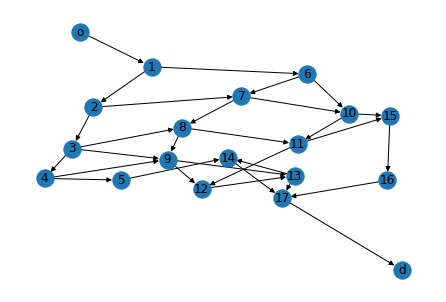

In [42]:
#doublecheck with the nx library
G_3.add_edges_from([("o",1),(17,"d")])
G_3["o"][1]["capacity"]=float("inf")
G_3[17]["d"]["capacity"]=float("inf")
nx.draw(G_3, with_labels=True)

print(f"The maximum flow from 1 to 17 is {nx.algorithms.flow.minimum_cut(G_3,'o','d')[0]}")


c) Given the flow vector in flow.mat, compute the external inflow ν satisfying Bf = ν.

In [37]:
nu = B@flow
nu_simplified = nu
for i in range(len(nu_simplified)):
    if i>0 and i<len(nu_simplified)-1:
        nu_simplified[i]=0
    elif i==len(nu_simplified)-1:
        nu_simplified[i]=-nu_simplified[0]

print(f"The external inflow is: {nu_simplified}")

The external inflow is: [ 16806      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0 -16806]


d) Find the social optimum f∗ with respect to the delays on the different links de(fe).

In [36]:
#define and solve the minimization problem for the social optimum
social_f = cp.Variable(n_edges)
den =  np.ones(n_edges)-(social_f/capacities)
num = traveltime*capacities
objective = cp.Minimize(cp.inv_pos(den)@num-\
                        traveltime.T@capacities)
constraints = [B @ social_f == nu_simplified, \
               social_f >=0, social_f<=capacities-1]
prob = cp.Problem(objective, constraints)
social_optimum = prob.solve()

print(f"Optimal exogenous inflow vector :{f.value}")
print(f"Optimal cost: {social_optimum}")

Optimal exogenous inflow vector :[ 8740.99999772  7200.35118998  5181.46137693  3471.54162199
 13706.99999536  6025.30317449  4904.63321027  3485.31817804
  3558.7097803   1540.64880774  1010.40712482  1008.48268823
  1709.91975493  3471.54162199  7681.69682087  4795.8075912
  5547.20800163  2661.31877196  2429.72215705  2645.0108409
  5274.98623058  7919.99707148  3317.94393597  1950.54351767
  8160.76291582  6789.48555796  7497.7515193   7497.7515193 ]
Optimal cost: 25943.61566052671


e) Find the Wardrop equilibrium given the cost function.

In [34]:
#define and solve the minimization problem
wardrop_f = cp.Variable(n_edges)
objective = cp.Minimize((capacities*traveltime) @ \
                        (cp.log(capacities) - \
                         cp.log(capacities-wardrop_f) ))
constraints = [B @ wardrop_f == nu_simplified, wardrop_f >=0\
               , wardrop_f<=capacities-1]
prob = cp.Problem(objective, constraints)
prob.solve()
#computing the Wardrop cost
wardrop_cost = np.sum(((traveltime*capacities)/\
                       (np.ones(len(wardrop_f.value))- \
                        wardrop_f.value/capacities)) - \
                      traveltime*capacities)
#we compute the price of anarchy
price_of_anarchy = wardrop_cost/social_optimum
print(f"The Wardrop cost is: {wardrop_cost}, so we have price of anarchy: {price_of_anarchy}")


The Wardrop cost is: 26292.96256960744, so we have price of anarchy: 1.013465621509814


f)Introduce tolls, such that the toll on link e is ωe = fe∗d′e(fe∗), where fe∗ is the flow at the system optimum. Now the delay on link e is given by de(fe)+ωe. compute the new Wardrop equilibrium f(ω). What do you observe?

In [33]:
#we first define tolls
tolls = ((capacities*traveltime)/\
         np.power(capacities-social_f.value,2))*social_f.value
#define and solve the minimization problem
tolls_f = cp.Variable(n_edges)
objective = cp.Minimize((capacities*traveltime) @ \
                        (cp.log(capacities) - \
                         cp.log(capacities-tolls_f) )+tolls@tolls_f)
constraints = [B @ tolls_f == nu_simplified, \
               tolls_f >=0, tolls_f<=capacities-1]
prob = cp.Problem(objective, constraints)
prob.solve()
#computing the Wardrop tolls cost
wardrop_tolls_cost = np.sum(((traveltime*capacities)/\
                             (np.ones(len(tolls_f.value))- \
                              tolls_f.value/capacities)) - \
                            traveltime*capacities)
#we compute the price of anarchy
price_of_anarchy_tolls = wardrop_tolls_cost/social_optimum
print(f"With tolls, the price of anarchy is :{price_of_anarchy_tolls}")


With tolls, the price of anarchy is :1.000000275833883


g) Instead of the total delay, let the cost be the total additional delay compared to the total delay in free flow be given by the new given function. Compute the system optimum f∗ for the costs above. Con- struct tolls ωe∗, e ∈ E such that the new Wardrop equilibrium with the constructed tolls f(ω∗) coincides with f∗. Compute the new Wardrop equilibrium with the constructed tolls f(ω∗) to verify your result.

In [31]:
#we compute the new social optimum
#define and solve the minimization problem
social_f2 = cp.Variable(n_edges)
den =  np.ones(n_edges)-(social_f2/capacities)
num = traveltime*capacities

objective = cp.Minimize(cp.inv_pos(den)@num-traveltime.T@capacities \
                        - social_f2.T@traveltime)
constraints = [B @ social_f2 == nu_simplified, social_f2 >=0, \
               social_f2<=capacities-1]
prob = cp.Problem(objective, constraints)
social_optimum2 = prob.solve()
print(f'Optimal cost: {social_optimum2}')

Optimal cost: 15095.50818984022


In [32]:
#we first define tolls
tolls2 = ((capacities*traveltime)/np.power(capacities-social_f2.value,2))*social_f2.value
#define and solve the minimization problem
tolls_f2 = cp.Variable(n_edges)
objective = cp.Minimize((capacities*traveltime) \
                        @ (cp.log(capacities) - \
            cp.log(capacities-tolls_f2) )+tolls2@tolls_f2 - \
                        traveltime.T@tolls_f2)
constraints = [B @ tolls_f2 == nu_simplified, tolls_f2 >=0, \
               tolls_f2<=capacities-1]
prob = cp.Problem(objective, constraints)
prob.solve()
#computing the Wardrop tolls cost
wardrop_tolls2_cost = np.sum(((traveltime*capacities)/\
                        (np.ones(len(tolls_f2.value))- \
                         tolls_f2.value/capacities)) - \
                        traveltime*capacities - \
                             traveltime*tolls_f2.value)
#we compute the price of anarchy
price_of_anarchy_tolls2 = wardrop_tolls2_cost / social_optimum2
print(f"The new Wardrop equilibrium results in a price of anarchy of: {price_of_anarchy_tolls2}")

The new Wardrop equilibrium results in a price of anarchy of: 1.000000335721437
